# Exercícios de Fixação de Conceitos 1

### Índice
- Definição do problema de classificação</p>
- *Dataset*: consideraçõs e análise</p>
    - Estrutura do *dataset*
    - Distribuição de frequências em função das classes (Histograma)
    - Visualização de imagens de dígitos manuscritos
- Conjuntos de treinamento e validação
- Classificador Linear
    - Modelo regularizado
    - Cálculo do erro quadrático médio
    - Cálculo do erro de classificação
    - Algoritmo para resolução do problema
- Resultados
    - Gráficos semilog do desempenho dos classificadores junto aos dados de validação para os 11 valores de coeficientes de regularização sugeridos
        - Desempenho baseado no erro quadrático médio
        - Desempenho baseado no erro de classificação
    - Gráficos semilog com uma busca refinida no entorno do mínimo dos gráficos anteriores
        - Desempenho baseado no erro quadrático médio
        - Desempenho baseado no erro de classificação
    - Valores dos 4 coeficientes de regularização encontrados na busca
    - Para o melhor classificador considerando o desempenho baseado no erro de classificação:
        - Obter a matriz de parâmetros do modelo
        - Gerar um gráfico de calor para cada um dos 10 classificadores lineares contidos no modelo
        - Matriz de confusão
        - Exemplos de dígitos classificados incorretamente

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
from sklearn.model_selection import train_test_split

In [2]:
def onehot_to_categorical(y_onehot):
    aux = y_onehot.argmax()
    if aux < 9:
        return aux + 1
    else:
        return 0

In [3]:
def plot_hist(y_categorical, titleText, ymax, step):
    plt.figure(figsize=(8,4))
    
    plt.xlabel('Classes')
    plt.ylabel('Frequência')
    plt.xticks(range(0,10))
    plt.yticks(range(0, ymax, step))

    plt.title(titleText)
    #plt.grid(True, axis='y')

    a = plt.hist(y_categorical, range=(-0.5, 9.5), bins=20, align='left', color='royalblue');
    return a

In [4]:
def plot_digit_images(X, Y_categorical, titlesText, Nimgs=5):
    plt.figure(figsize=(15,4))
    i = rn.randint(0, X.shape[0])

    for index, (image, label) in enumerate(zip(X[i:i+Nimgs], Y_categorical[i:i+Nimgs])):
        plt.subplot(1, Nimgs, index + 1)
        X_image = np.transpose(np.reshape(image, (28, 28)))
        plt.imshow(X_image, cmap='gray')
        plt.title(titlesText + f'{label}\n', fontsize = 12)

In [5]:
path = '../EFC1/dataset/'

data = scipy.io.loadmat(path + 'data.mat')
test = scipy.io.loadmat(path + 'test.mat')

X = data['X'] 
Y = data['S'] 

Xtest = test['Xt']
Ytest = test['St']

Y_categorical = np.array(tuple(map(onehot_to_categorical, Y)))
Ytest_categorical = np.array(tuple(map(onehot_to_categorical, Ytest)))

-------------------------------------------------------------
### Definição do problema

- O objetivo deste exercício consiste em sintetizar modelos lineares para classificação de padrões.
- É utilizado o famoso *dataset* de imagens de dígitos manuscritos [MNIST](http://yann.lecun.com/exdb/mnist/), o qual contém 60.000 amostras para treinamento e 10.000 amostras para teste.
- Cada imagem de entrada contém 784 pixels (no intervalo [0, 255], correspondente a níveis de cinza), visto que a dimensão de cada uma delas é de 28x28 pixels.
- O problema de classificação investigado é do tipo multi-classe (10 classes), sendo que cada classe representa um dígito de 0 a 9.

-----------------------------------------------------------------
### *Dataset*: Considerações e Análise

- **Estrutura do** ***dataset*** **:**
    - Os dados de treinamento estão contidos nas matrizes X (entradas) e Y (saídas).
    
    - Matriz X:
        - Cada linha representa uma amostra de entrada (imagem).
        - Cada coluna contém um pixel da amostra de entrada.
        - A dimensão da matriz X é de 60.000x784 (Temos 60.000 amostras cada uma com 784 pixels).
        
    - Matriz Y:
        - Cada linha representa a saída verdadeira correspondente a uma amostra de entrada.
        - Cada saída está na representação *one-hot encoding*, isto é, só existe um elemento não nulo responsável por indicar a classe a qual a amostra pertence.
        - Cada coluna representa uma classe:
            - Colunas 0 a 8 representam as classes referentes aos dígitos 1 a 9, respectivamente.
            - Coluna 9 representa a classe referente ao dígito 0.
    
    - As matrizes Xtest e Ytest do conjunto de teste possuem as mesmas características acima
        - A dimensão da matriz Xtest é de 10.000x784 (Temos 10.000 amostras cada uma com 784 pixels
        - A dimensão da matriz Ytest é de 10.000x10.

In [6]:
print(f'Dimensão da matriz X: {X.shape}')
print(f'Dimensão da matriz Y: {Y.shape}')
print('--------------------------------------')
print(f'Dimensão da matriz Xtest: {Xtest.shape}')
print(f'Dimensão da matriz Ytest: {Ytest.shape}')

Dimensão da matriz X: (60000, 784)
Dimensão da matriz Y: (60000, 10)
--------------------------------------
Dimensão da matriz Xtest: (10000, 784)
Dimensão da matriz Ytest: (10000, 10)


In [7]:
n1 = rn.randint(0, Y.shape[0])
n2 = rn.randint(0, Ytest.shape[0])

print('Exemplo do conjunto de treinamento:')
print(f'Saída na representação one-hot encoding: {Y[n1]}')
print(f'Saída na representação categórica: {Y_categorical[n1]}')

print('--------------------------------------------------------------')

print('Exemplo do conjunto de teste:')
print(f'Saída na representação one-hot encoding: {Ytest[n2]}')
print(f'Saída na representação categórica: {Ytest_categorical[n2]}')

Exemplo do conjunto de treinamento:
Saída na representação one-hot encoding: [0 0 0 0 0 0 1 0 0 0]
Saída na representação categórica: 7
--------------------------------------------------------------
Exemplo do conjunto de teste:
Saída na representação one-hot encoding: [0 0 1 0 0 0 0 0 0 0]
Saída na representação categórica: 3


- **Distribuição de frequências em função das classes (Histograma)**

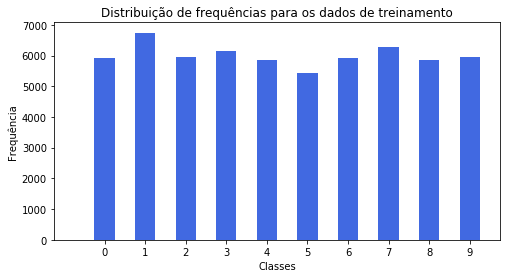

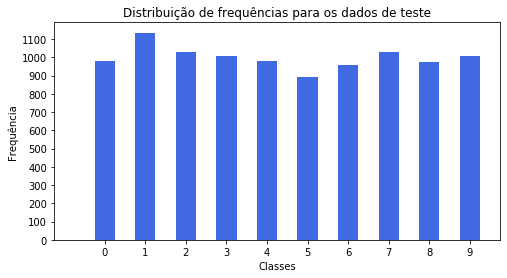

In [8]:
plot_hist(Y_categorical, titleText='Distribuição de frequências para os dados de treinamento', ymax=10000, step=1000);
plot_hist(Ytest_categorical, titleText='Distribuição de frequências para os dados de teste', ymax=1200, step=100);

- **Visualização de imagens de dígitos manuscritos**

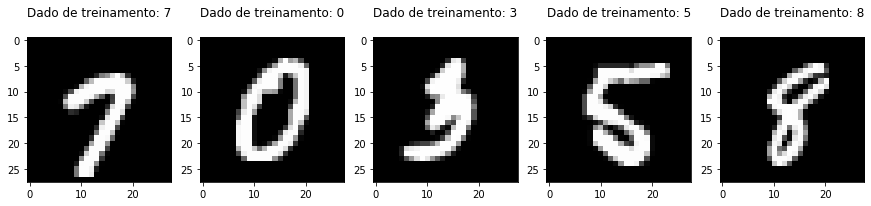

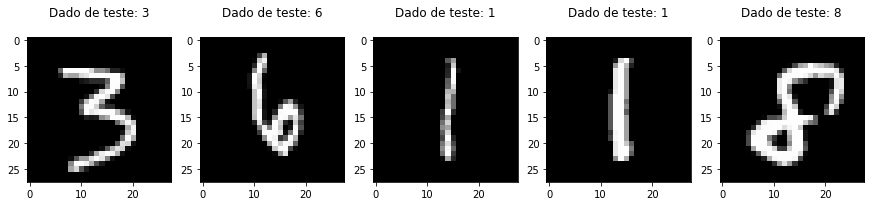

In [9]:
plot_digit_images(X, Y_categorical, titlesText='Dado de treinamento: ', Nimgs=5)
plot_digit_images(Xtest, Ytest_categorical, titlesText='Dado de teste: ', Nimgs=5)

-----------------------------------------------------------------
### Conjuntos de treinamento e validação

- **Validação cruzada**
    - Para aumentar a **capacidade de generalização** do modelo, é utilizado a estratégia de validação cruzada conhecida por ***holdout***, em que dividimos as amostras de treinamento da seguinte forma:
        - Conjunto de treinamento: 80% das amostras são utilizadas para treinar o modelo, gerando em um classificador.
        - Conjunto de validação: 20% das amostras são utilizadas para validar o modelo gerado, isto é, são utilizadas na etapa de análise de desempenho.

In [10]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=40)

In [11]:
print(f'Dimensão da matriz Xtrain: {Xtrain.shape}')
print(f'Dimensão da matriz Ytrain: {Ytrain.shape}')
print('--------------------------------------')
print(f'Dimensão da matriz Xval: {Xval.shape}')
print(f'Dimensão da matriz Yval: {Yval.shape}')

Dimensão da matriz Xtrain: (48000, 784)
Dimensão da matriz Ytrain: (48000, 10)
--------------------------------------
Dimensão da matriz Xval: (12000, 784)
Dimensão da matriz Yval: (12000, 10)


- **Dados balanceados e representativos**
    - Uma importante característica que devemos manter nos dois novos conjuntos é o **balanceamento das classes**, para que os dados utilizados tanto no conjunto de treinamento quanto no de validação sejam **representativos** do problema. Para isso, podemos observar as distribuições de frequência dos dois conjuntos.
    - Como pode ser observado nos resultados abaixo, a proporção de dados por classe em ambos os conjuntos está em um valor adequado.

In [12]:
Ytrain_categorical = np.array(tuple(map(onehot_to_categorical, Ytrain)))
Yval_categorical = np.array(tuple(map(onehot_to_categorical, Yval)))

Representação das classes no conjunto de treinamento:
Classe 0:  9.88%
Classe 1:  11.23%
Classe 2:  9.88%
Classe 3:  10.19%
Classe 4:  9.74%
Classe 5:  9.16%
Classe 6:  9.87%
Classe 7:  10.41%
Classe 8:  9.81%
Classe 9:  9.82%


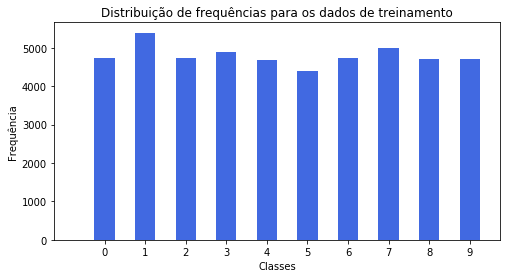

In [13]:
aux_train = plot_hist(Ytrain_categorical, titleText='Distribuição de frequências para os dados de treinamento', ymax=10000, step=1000)

aux = aux_train[0]
aux = aux[1:len(aux):2]
aux = aux*100/Xtrain.shape[0]
print('Representação das classes no conjunto de treinamento:')
for i in range(len(aux)):
    print(f'Classe {i}:  {round(aux[i],2)}%')

Representação das classes no conjunto de treinamento:
Classe 0:  9.82%
Classe 1:  11.26%
Classe 2:  10.12%
Classe 3:  10.32%
Classe 4:  9.73%
Classe 5:  8.52%
Classe 6:  9.83%
Classe 7:  10.57%
Classe 8:  9.53%
Classe 9:  10.28%


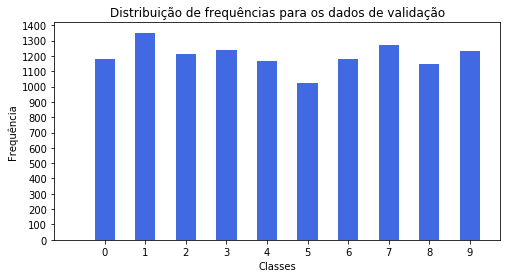

In [14]:
aux_val = plot_hist(Yval_categorical, titleText='Distribuição de frequências para os dados de validação', ymax=1500, step=100);

aux = aux_val[0]
aux = aux[1:len(aux):2]
aux = aux*100/Xval.shape[0]
print('Representação das classes no conjunto de treinamento:')
for i in range(len(aux)):
    print(f'Classe {i}:  {round(aux[i],2)}%', )